In [ ]:

%%time

#! rm -fr food_mnist
! git clone https://github.com/srohit0/food_mnist.git

import food_mnist
from google.colab.patches import cv2_imshow

Cloning into 'food_mnist'...
remote: Enumerating objects: 5094, done.
remote: Total 5094 (delta 0), reused 0 (delta 0), pack-reused 5094
Receiving objects: 100% (5094/5094), 239.57 MiB | 40.27 MiB/s, done.
Resolving deltas: 100% (37/37), done.
Checking out files: 100% (5015/5015), done.
CPU times: user 168 ms, sys: 46.2 ms, total: 214 ms
Wall time: 10.1 s


In [ ]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import food_mnist
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os


In [ ]:
#(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
#labels_dict = food_mnist.labels()
#print(labels_dict)


In [ ]:
batch_size = 1000
epochs = 100
num_classes = 10

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels


def divide_dataset(dataset, labels):
    train_pct = 0.80; 
    # divide dataset into training and validation set
    train_index = int(dataset.shape[0]*train_pct)
    t_X = dataset[:train_index, :]
    t_Y = labels[:train_index]
    v_X = dataset[train_index:,:]
    v_Y = labels[train_index:]
    
    return (t_X, t_Y), (v_X, v_Y)

# input image dimensions
img_rows, img_cols, img_channels = 56, 56, 3
input_shape = (img_rows, img_cols, img_channels)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = food_mnist.load_data(img_cols, img_rows)
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

X, Y = randomize(X, Y)
(x_train, y_train), (x_test, y_test) = divide_dataset(X, Y)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, img_channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, img_channels)

x_train = x_train.astype('float16') / 255.0
x_test = x_test.astype('float16') / 255.0


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[56, 56, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding a third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu', name = 'Dense_01'))
# Step 5 - second Dense Layer
cnn.add(tf.keras.layers.Dense(units=10, activation='relu',name = 'Dense_02'))
# Step 6- Dropout
cnn.add(tf.keras.layers.Dropout(0.5,name = 'Dropout_02'))
# Step 7 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
            # ='linear'))
cnn.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs= epochs, validation_data=(x_test, y_test))


Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 1.2711 - accuracy: 0.1105 - val_loss: 1.2691 - val_accuracy: 0.1530
Epoch 2/100
4/4 [==============================] - 4s 983ms/step - loss: 1.2684 - accuracy: 0.1304 - val_loss: 1.2666 - val_accuracy: 0.1190
Epoch 3/100
4/4 [==============================] - 4s 993ms/step - loss: 1.2654 - accuracy: 0.1288 - val_loss: 1.2633 - val_accuracy: 0.1840
Epoch 4/100
4/4 [==============================] - 4s 999ms/step - loss: 1.2621 - accuracy: 0.1411 - val_loss: 1.2599 - val_accuracy: 0.1940
Epoch 5/100
4/4 [==============================] - 4s 984ms/step - loss: 1.2593 - accuracy: 0.1441 - val_loss: 1.2563 - val_accuracy: 0.1700
Epoch 6/100
4/4 [==============================] - 4s 991ms/step - loss: 1.2552 - accuracy: 0.1714 - val_loss: 1.2522 - val_accuracy: 0.1990
Epoch 7/100
4/4 [==============================] - 4s 990ms/step - loss: 1.2504 - accuracy: 0.1697 - val_loss: 1.2481 - val_accuracy: 0.1960
Epoch 8/100
4/4 

In [ ]:
score = cnn.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('\n########################################\n#   T E S T    A C C U R A C Y:', (score[1]*100), "%\n########################################")

1/1 [==============================] - 0s 270ms/step - loss: 1.1489 - accuracy: 0.2890

########################################
#   T E S T    A C C U R A C Y: 28.9000004529953 %
########################################


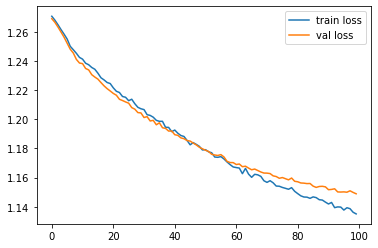

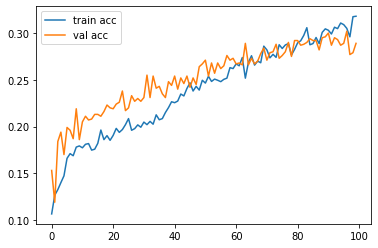

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!wget -O samosa.jpg http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
!wget -O applepie.jpg https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
!wget -O babybackribs.jpg https://cook.fnr.sndimg.com/content/dam/images/cook/fullset/2012/5/11/0/0041270F1_Baby-Back-Ribs_s4x3.jpg.rend.hgtvcom.826.620.suffix/1369245981352.jpg
!wget -O baklava.jpg https://cleobuttera.com/wp-content/uploads/2018/03/lifted-baklava-720x720.jpg
!wget -O beefcarpaccio.jpg https://www.seriouseats.com/recipes/images/2013/05/20130531-italian-easy-carpaccio.jpg

In [ ]:
images = []
images.append('applepie.jpg')
images.append('babybackribs.jpg')
images.append('baklava.jpg')
predict_class(cnn, images, True)
